In [3]:
 
import numpy as np
import pandas as pd
import scipy as sp  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd


base_path = 'C:/Users/user/Desktop/Machine Learning/alx-movie-recommendation-project-2024/'


train_df = pd.read_csv(base_path + 'train.csv')
movies_df = pd.read_csv(base_path + 'movies.csv')
imdb_df = pd.read_csv(base_path + 'imdb_data.csv')
test_df = pd.read_csv(base_path + 'test.csv')
links_df = pd.read_csv(base_path + 'links.csv')
tags_df = pd.read_csv(base_path + 'tags.csv')
genome_scores_df = pd.read_csv(base_path + 'genome_scores.csv')
genome_tags_df = pd.read_csv(base_path + 'genome_tags.csv')
sample_submission_df = pd.read_csv(base_path + 'sample_submission.csv')




In [4]:
train_df.tail(20)

,userId,movieId,rating,timestamp
10000018,19794,112552,4.0,1441484621
10000019,131331,5956,3.5,1516059481
10000020,58690,4310,4.0,1254821998
10000021,94613,364,3.0,1317119939
10000022,42452,551,2.0,1211416860
10000023,111647,381,5.0,987892353
10000024,116714,364,5.0,1063749451
10000025,59403,2436,4.0,1096065146
10000026,122954,1206,3.0,1026857765
10000027,66681,94677,5.0,1568915740


In [5]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [7]:
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [8]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [10]:
genome_scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [11]:
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [12]:
sample_submission_df.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [13]:
movies_df.shape

(62423, 3)

In [14]:

print("Train: ")
print(str(train_df.isnull().sum()))
print("************")
print("Test: ")
print(str(test_df.isnull().sum()))
print("************")
print("Movies: ")
print(str(movies_df.isnull().sum()))
print("************")
print("Links: ")
print(str(links_df.isnull().sum()))
print("************")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("************")
print("Genome scores: ")
print(str(genome_scores_df.isnull().sum()))
print("************")
print("Genome tags: ")
print(str(genome_tags_df.isnull().sum()))


Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
************
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
************
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
************
Genome tags: 
tagId    0
tag      0
dtype: int64


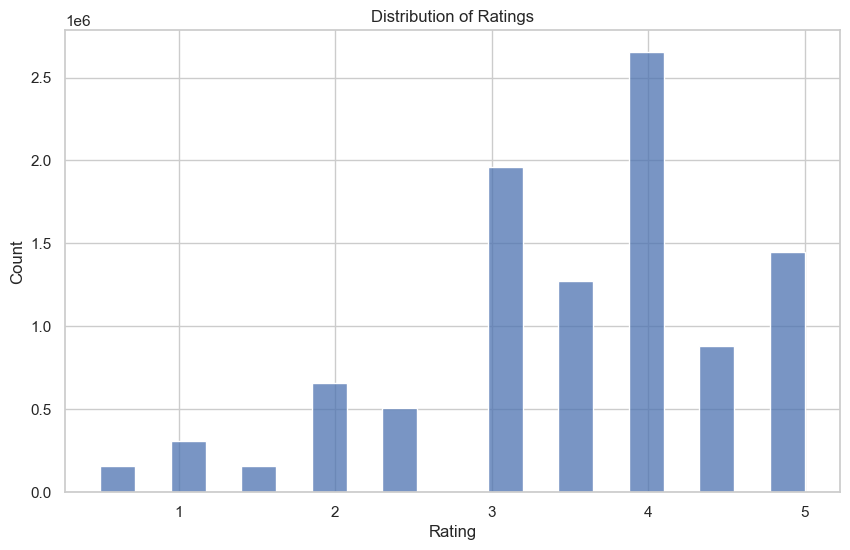

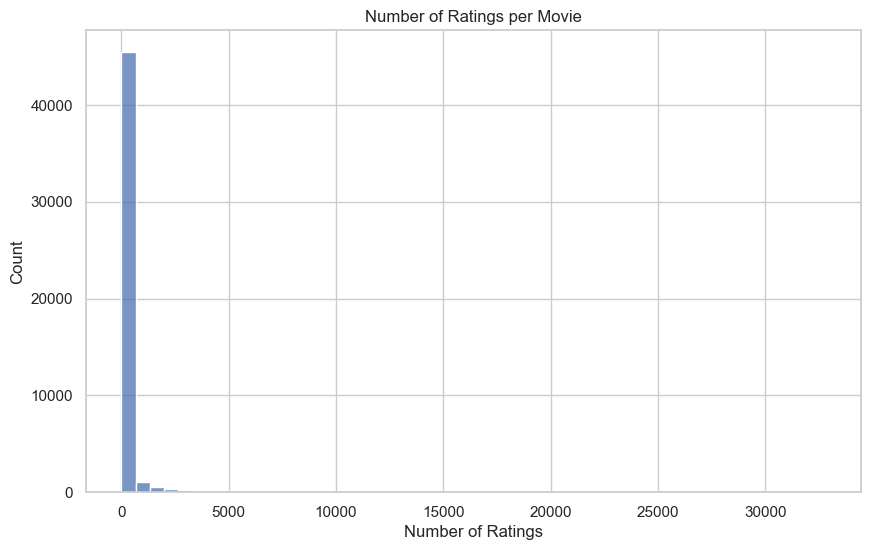

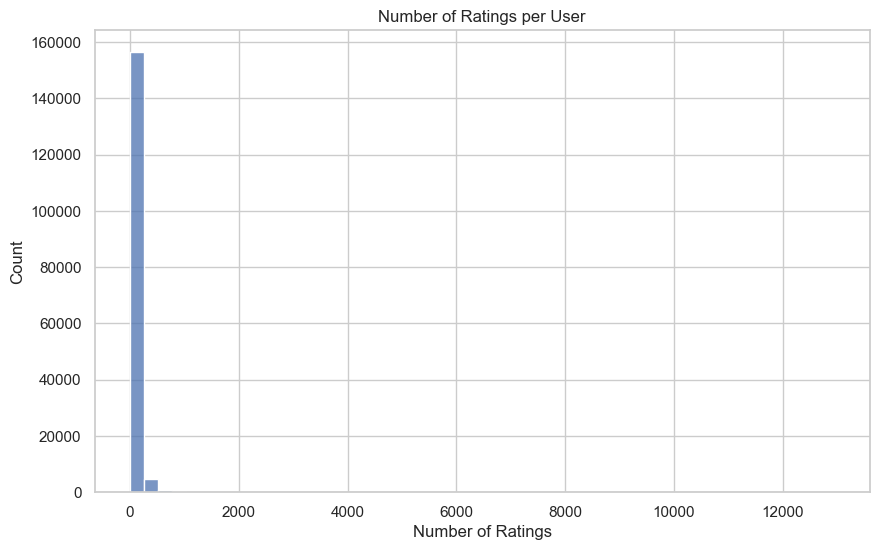

In [15]:
sns.set(style="whitegrid")

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(train_df['rating'], bins=20, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Number of ratings per movie
ratings_per_movie = train_df.groupby('movieId').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=50, kde=False)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

# Number of ratings per user
ratings_per_user = train_df.groupby('userId').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=False)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()


In [16]:
movies_df = movies_df.iloc[0:1000]

In [19]:
import re
movies_df['auth_tags'] = (pd.Series(movies_df[['title', 'genres']]
                      .fillna('')
                      .values.tolist()).str.join(' '))


titles = movies_df['title']
indices = pd.Series(movies_df.index, index=movies_df['title'])

In [20]:
movies_df['auth_tags'] = movies_df['auth_tags'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', x))

In [21]:
movies_df.head()

,movieId,title,genres,auth_tags
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,ToyStory1995AdventureAnimationChildrenComedyFa...
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji1995AdventureChildrenFantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,GrumpierOldMen1995ComedyRomance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,WaitingtoExhale1995ComedyDramaRomance
4,5,Father of the Bride Part II (1995),Comedy,FatheroftheBridePartII1995Comedy


In [22]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0.0, stop_words='english')

tf_authTags_matrix = tf.fit_transform(movies_df['auth_tags'])

In [23]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix, 
                                        tf_authTags_matrix)
print (cosine_sim_authTags.shape)

(1000, 1000)


In [24]:
cosine_sim_authTags

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
def content_generate_top_N_recommendations(movies_df_title, N=10):
    
    b_idx = indices[movies_df_title]
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:N]
    movies_df_indices = [i[0] for i in sim_scores] 
    return titles.iloc[movies_df_indices]

In [26]:
content_generate_top_N_recommendations("Toy Story (1995)", N=10)

1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
5                           Heat (1995)
6                        Sabrina (1995)
7                   Tom and Huck (1995)
8                   Sudden Death (1995)
9                      GoldenEye (1995)
Name: title, dtype: object

In [27]:
def content_generate_rating_estimate(movies_id_title, user, rating_data, k=20, threshold=0.0):
    b_idx = indices[movies_id_title]
    neighbors = [] 
    for index, row in rating_data[rating_data['userid']==user].iterrows():
        sim = cosine_sim_authTags[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError: 
        predictedRating = np.mean(rating_data[rating_data['title']==movies_id_title]['rating'])
    return predictedRating

In [28]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)


trainset, testset = train_test_split(data, test_size=0.2)


model = SVD()
model.fit(trainset)


predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


RMSE: 0.8346
RMSE: 0.834649305807721


In [32]:
# Predict ratings for the test set
test_df['rating'] = test_df.apply(lambda x: model.predict(x['userId'], x['movieId']).est, axis=1)

# Format the submission file
test_df['Id'] = test_df['userId'].astype(str) + '_' + test_df['movieId'].astype(str)
submission5 = test_df[['Id', 'rating']]
submission5.to_csv('submission5.csv', index=False)

# Display the first few rows of the submission DataFrame
print(submission5.head())


       Id    rating
0  1_2011  3.678664
1  1_4144  4.353254
2  1_5767  3.804377
3  1_6711  4.081064
4  1_7318  2.630374
